<a href="https://colab.research.google.com/github/headnotf0und/refactored-octo-rotary-phone/blob/main/Chromebooki_analiza_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

In [2]:
chromebooks = np.array([
    [325, 11, 0, 1, 4, 32, 0, 2436, 2],  # Acer Spin 511
    [259, 11, 0, 1, 4, 32, 0, 1178, 0],  # Acer R11
    [339, 11, 0, 0, 4, 32, 0, 1423, 0],  # ASUS Chromebook C214M
    [300, 14, 1, 0, 8, 64, 0, 2867, 5],  # ASUS CHROMEBOOK C433T
    [309, 14, 1, 0, 8, 64, 0, 1107, 3],  # Asus Chromebook C523N
    [198, 11, 0, 0, 4, 32, 0, 1413, 0],  # Dell Chromebook 11
    [149, 11, 0, 0, 4, 32, 0, 661, 0],   # Dell Chromebook 11 3189
    [199, 11, 0, 0, 4, 32, 0, 1550, 5],  # Dell Chromebook 3100
    [169, 11, 0, 0, 4, 32, 0, 1107, 3],  # Dell Chromebook 5190
    [299, 11, 0, 0, 4, 32, 0, 1987, 5],  # HP 11 G8 EE
    [149, 11, 0, 0, 4, 32, 1, 2436, 5],  # HP Chromebook 11 G8
    [175, 11, 0, 0, 4, 32, 0, 812, 2],   # HP Chromebook 11A G8
    [349, 14, 0, 1, 4, 32, 0, 1031, 5],  # HP Chromebook 14 G4
    [310, 14, 1, 1, 8, 64, 1, 3151, 7],  # HP Chromebook 14b-na0245nd
    [579, 14, 1, 1, 8, 32, 0, 2271, 4],  # HP Chromebook X360 14 G1
    [199, 11, 0, 1, 4, 32, 0, 1550, 5],  # HP Chromebook X360 G3
    [350, 14, 1, 1, 8, 32, 0, 2218, 1],  # HP x360 14 G1
    [599, 14, 1, 0, 8, 64, 0, 3350, 3],  # HP X360 14 G1 i3
    [329, 11, 0, 1, 4, 32, 0, 2436, 5],  # Lenovo Chromebook 300E
    [299, 11, 0, 1, 4, 32, 1, 1986, 5],  # Lenovo Chromebook 500E II
])

# Nazwy Chromebooków
chromebook_names = [
    "Acer Spin 511", "Acer R11", "ASUS Chromebook C214M", "ASUS CHROMEBOOK C433T", "Asus Chromebook C523N",
    "Dell Chromebook 11", "Dell Chromebook 11 3189", "Dell Chromebook 3100", "Dell Chromebook 5190", "HP 11 G8 EE",
    "HP Chromebook 11 G8", "HP Chromebook 11A G8", "HP Chromebook 14 G4", "HP Chromebook 14b-na0245nd", "HP Chromebook X360 14 G1",
    "HP Chromebook X360 G3", "HP x360 14 G1", "HP X360 14 G1 i3", "Lenovo Chromebook 300E", "Lenovo Chromebook 500E II"
]

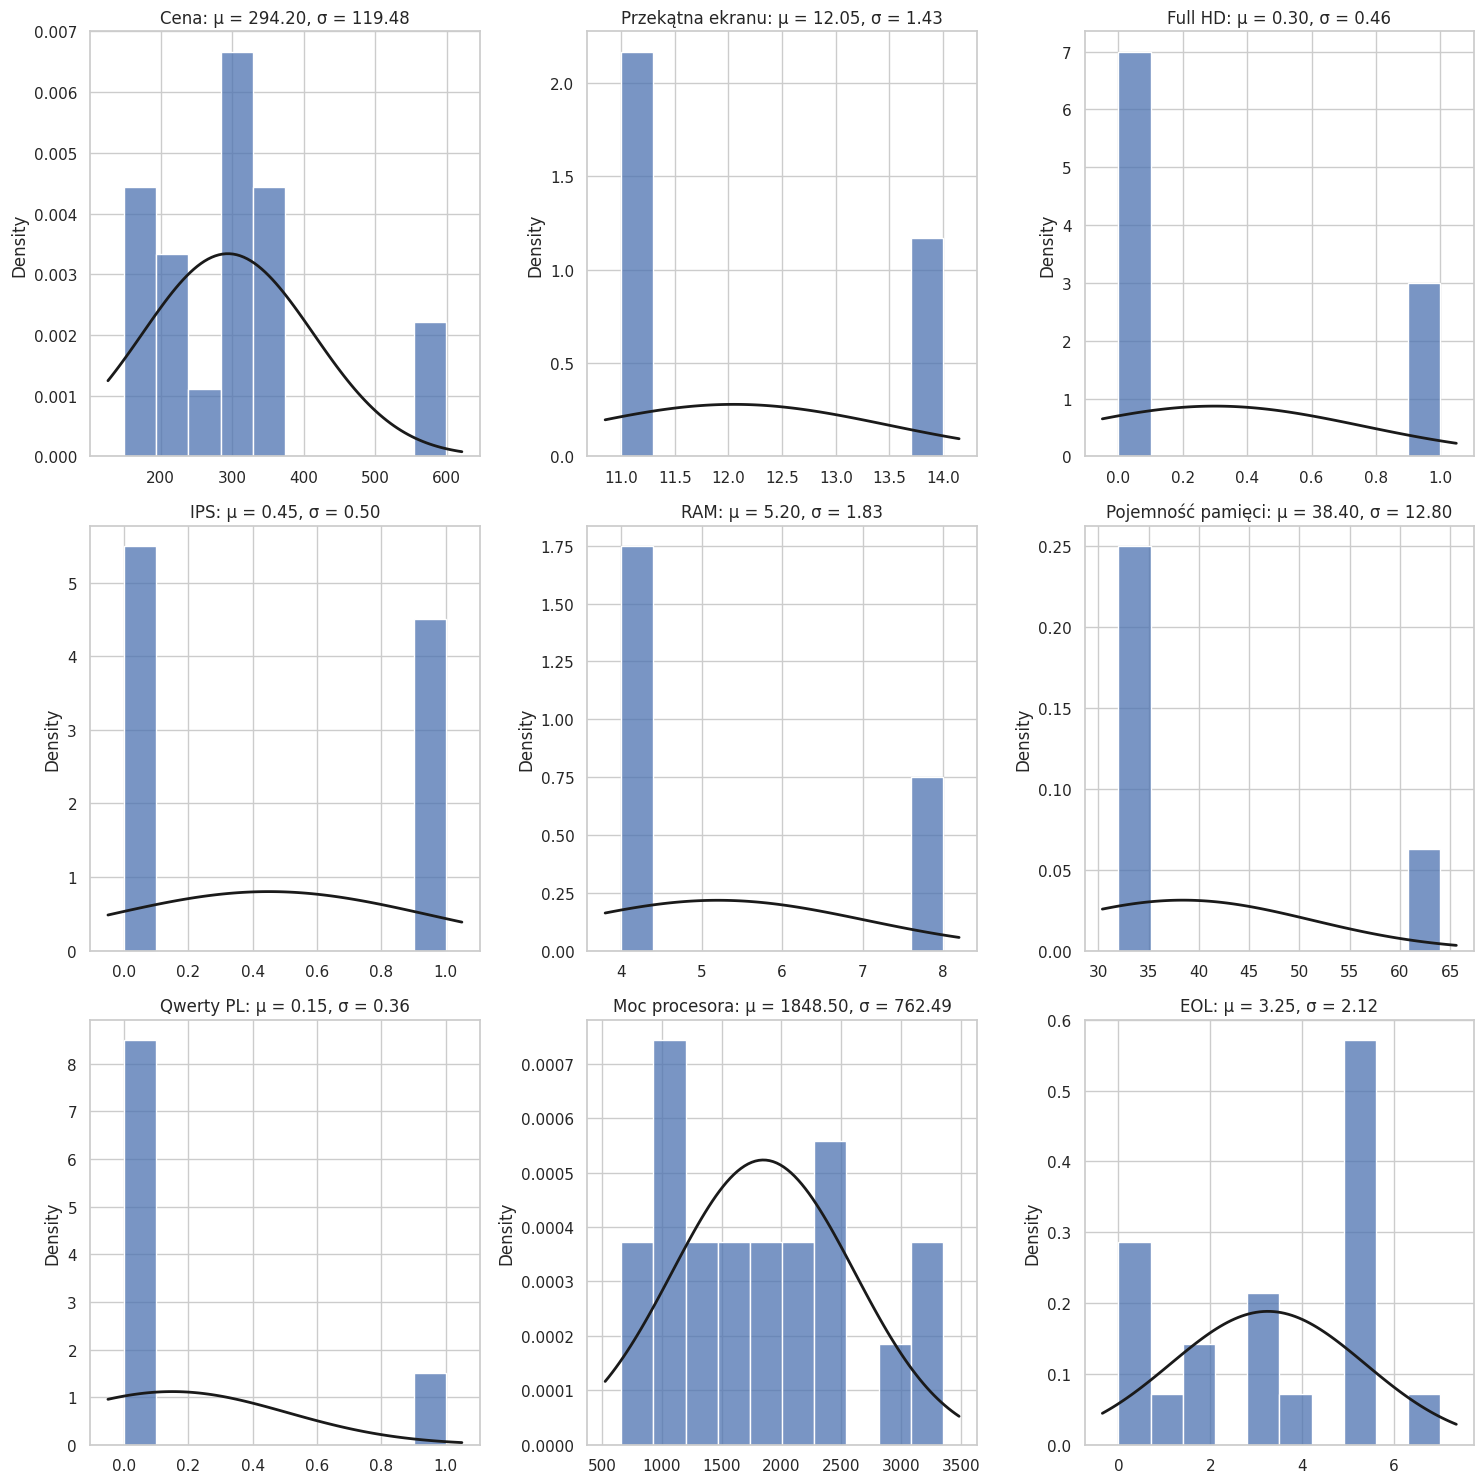

In [4]:
# Nazwy zmiennych
variables = ["Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"]

# Ustawienia wykresów
sns.set(style="whitegrid")

# Stworzenie wykresów Gaussa
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(chromebooks[:, i], bins=10, kde=False, stat="density", ax=ax)
    # Obliczenie wartości średniej i odchylenia standardowego
    mean, std = np.mean(chromebooks[:, i]), np.std(chromebooks[:, i])
    # Generowanie wartości dla rozkładu normalnego
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'k', linewidth=2)
    title = f"{variables[i]}: μ = {mean:.2f}, σ = {std:.2f}"
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [5]:
# Tworzenie DataFrame
df = pd.DataFrame(chromebooks, columns=variables)

# Obliczanie podstawowych parametrów statystycznych
statistics = df.describe().transpose()
statistics['median'] = df.median()
statistics['var'] = df.var()
statistics['range'] = df.max() - df.min()
statistics['q1'] = df.quantile(0.25)
statistics['q3'] = df.quantile(0.75)

# Wyświetlanie wyników
print(statistics)

# Alternatywnie, jeśli chcesz wyświetlić wyniki w ładnym formacie
pd.set_option('display.float_format', '{:.2f}'.format)
print('\nAlternatywa prezyntacja\n')
print(statistics)

                   count     mean         std    min      25%     50%     75%  \
Cena                20.0   294.20  122.585137  149.0   198.75   299.5   331.5   
Przekątna ekranu    20.0    12.05    1.468081   11.0    11.00    11.0    14.0   
Full HD             20.0     0.30    0.470162    0.0     0.00     0.0     1.0   
IPS                 20.0     0.45    0.510418    0.0     0.00     0.0     1.0   
RAM                 20.0     5.20    1.880649    4.0     4.00     4.0     8.0   
Pojemność pamięci   20.0    38.40   13.132523   32.0    32.00    32.0    32.0   
Qwerty PL           20.0     0.15    0.366348    0.0     0.00     0.0     0.0   
Moc procesora       20.0  1848.50  782.299882  661.0  1160.25  1768.0  2436.0   
EOL                 20.0     3.25    2.173404    0.0     1.75     3.5     5.0   

                      max  median            var  range       q1      q3  
Cena                599.0   299.5   15027.115789    450   198.75   331.5  
Przekątna ekranu     14.0    11.0      

        Cena  Przekątna ekranu  Full HD   IPS   RAM  Pojemność pamięci  \
count  20.00             20.00    20.00 20.00 20.00              20.00   
mean  294.20             12.05     0.30  0.45  5.20              38.40   
std   122.59              1.47     0.47  0.51  1.88              13.13   
min   149.00             11.00     0.00  0.00  4.00              32.00   
25%   198.75             11.00     0.00  0.00  4.00              32.00   
50%   299.50             11.00     0.00  0.00  4.00              32.00   
75%   331.50             14.00     1.00  1.00  8.00              32.00   
max   599.00             14.00     1.00  1.00  8.00              64.00   

       Qwerty PL  Moc procesora   EOL  
count      20.00          20.00 20.00  
mean        0.15        1848.50  3.25  
std         0.37         782.30  2.17  
min         0.00         661.00  0.00  
25%         0.00        1160.25  1.75  
50%         0.00        1768.00  3.50  
75%         0.00        2436.00  5.00  
max         1

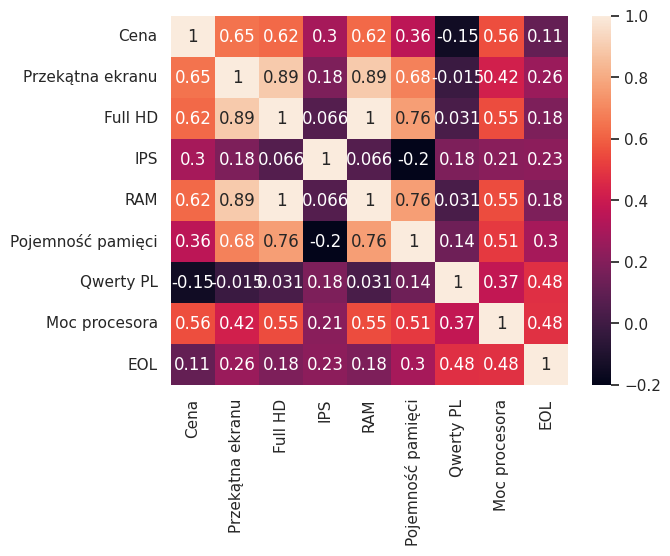

In [6]:
# Tworzenie DataFrame
columns = ["Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"]
chromebooks_df = pd.DataFrame(chromebooks, columns=columns, index=chromebook_names)

# Podstawowe statystyki opisowe
statystyki_opisowe = chromebooks_df.describe()
print(statystyki_opisowe)

# Macierz korelacji
korelacja = chromebooks_df.corr()
print(korelacja)

# Generowanie wykresu ciepła
mapa_ciepla = sns.heatmap(korelacja, annot=True)
cbar_kwargs=dict(label="Współczynnik korelacji",
                         title="Więcej oznacza silniejszy związek")

In [7]:
# Normalizacja danych

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
chromebooks_normalized = scaler.fit_transform(chromebooks)


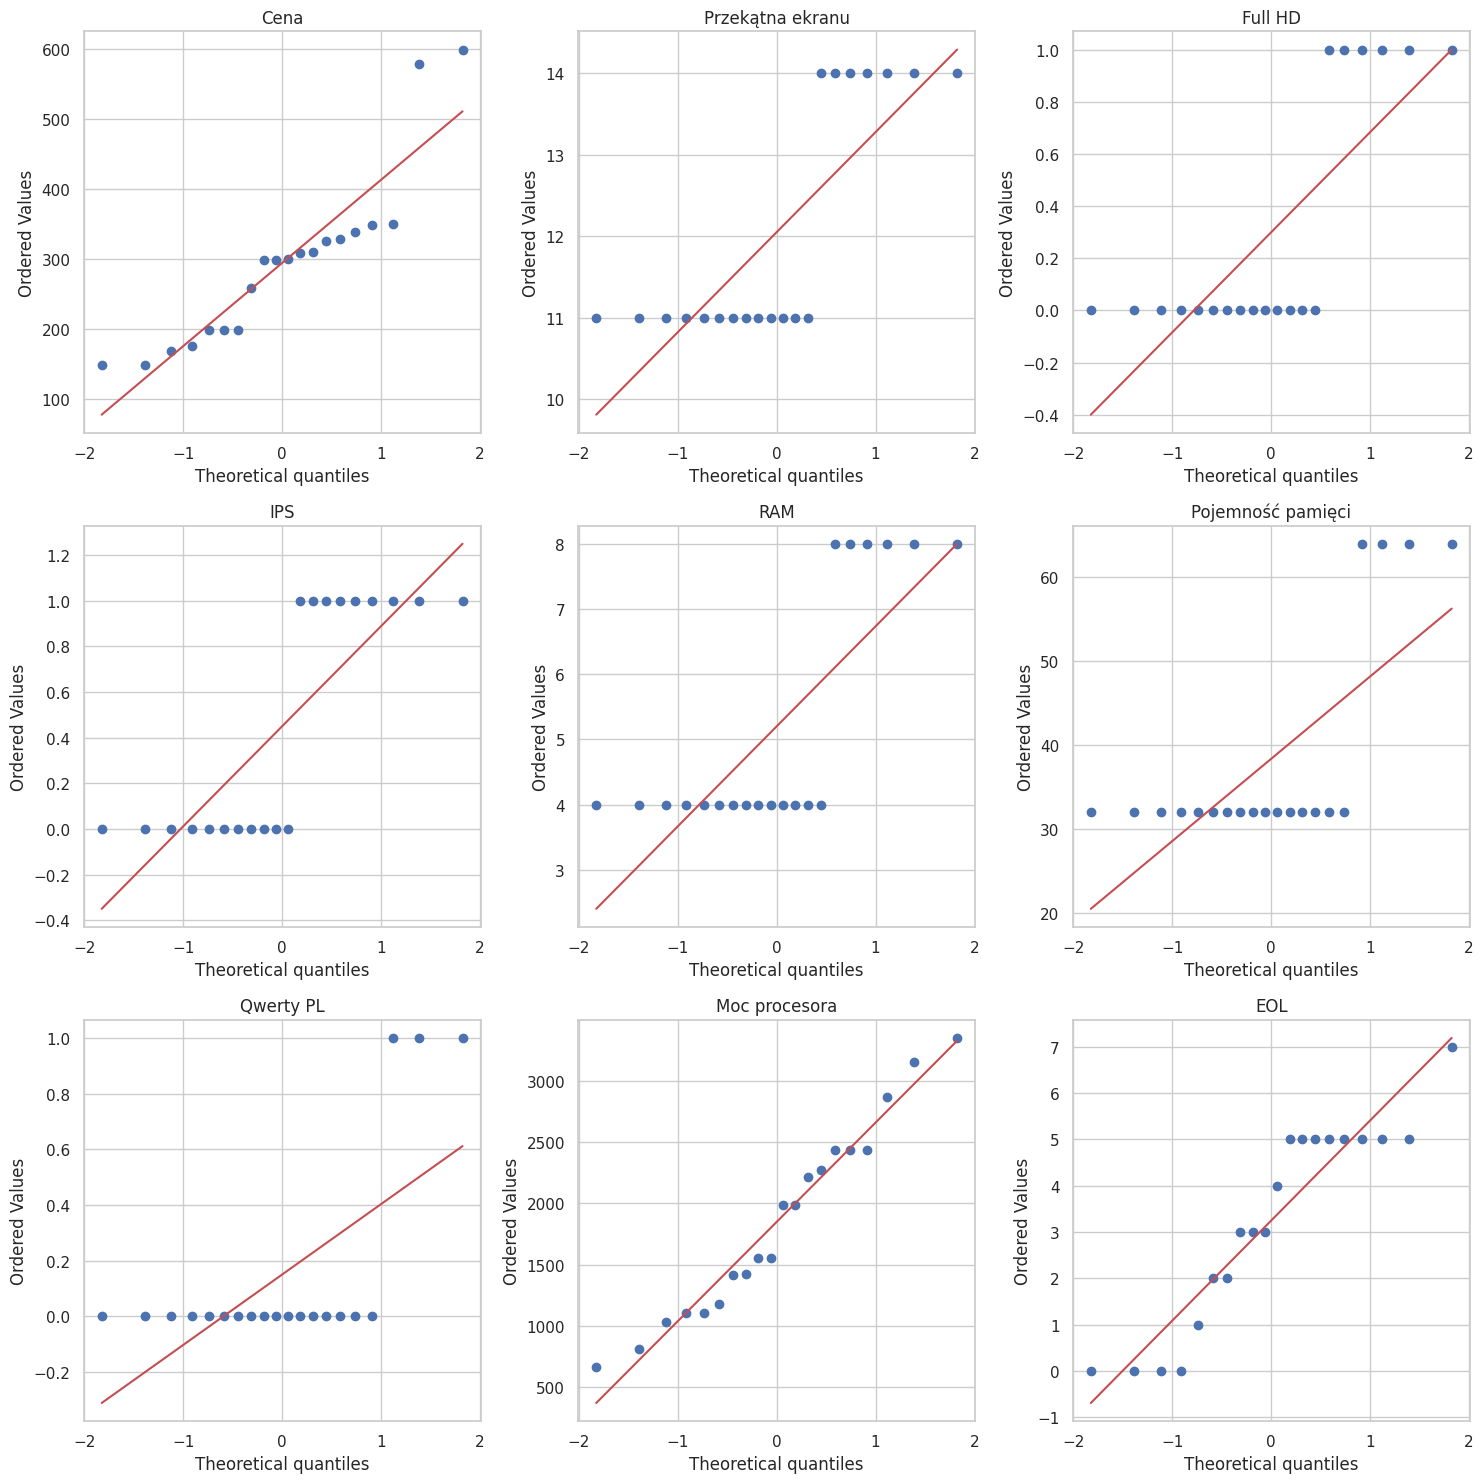

In [8]:


# Nazwy zmiennych
variables = ["Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"]

# Ustawienia stylu wykresów
sns.set(style="whitegrid")

# Tworzenie figury i osi dla wykresów QQ (Quantile-Quantile)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterowanie przez każdą zmienną i tworzenie wykresu QQ
for i, ax in enumerate(axes.flatten()):
    # Generowanie wykresu QQ dla zmiennej
    res = stats.probplot(chromebooks[:, i], dist="norm", plot=ax)
    # Ustawianie tytułu wykresu na nazwę zmiennej
    ax.set_title(variables[i])



# Dostosowanie układu wykresów
plt.tight_layout()
# Wyświetlanie wykresów
plt.show()



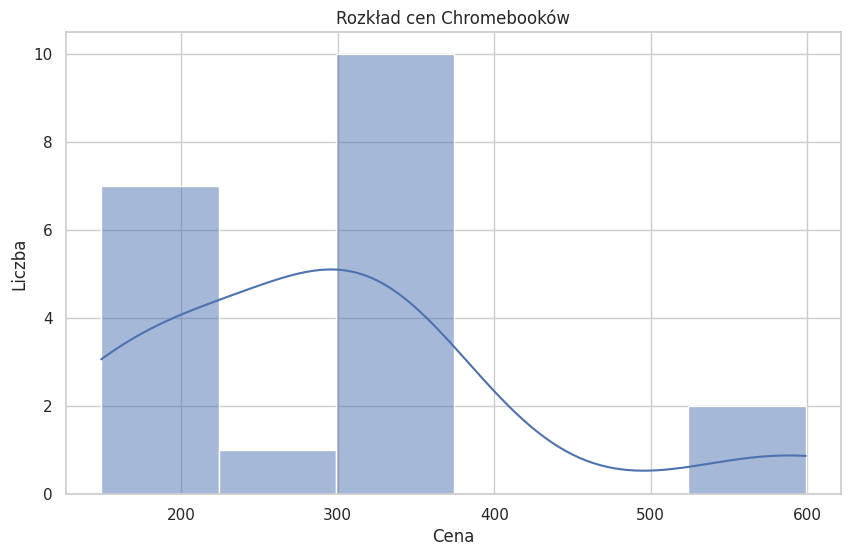

In [9]:
# Histogram cen
plt.figure(figsize=(10, 6))
sns.histplot(chromebooks_df['Cena'], kde=True)
plt.title('Rozkład cen Chromebooków')
plt.xlabel('Cena')
plt.ylabel('Liczba')
plt.show()

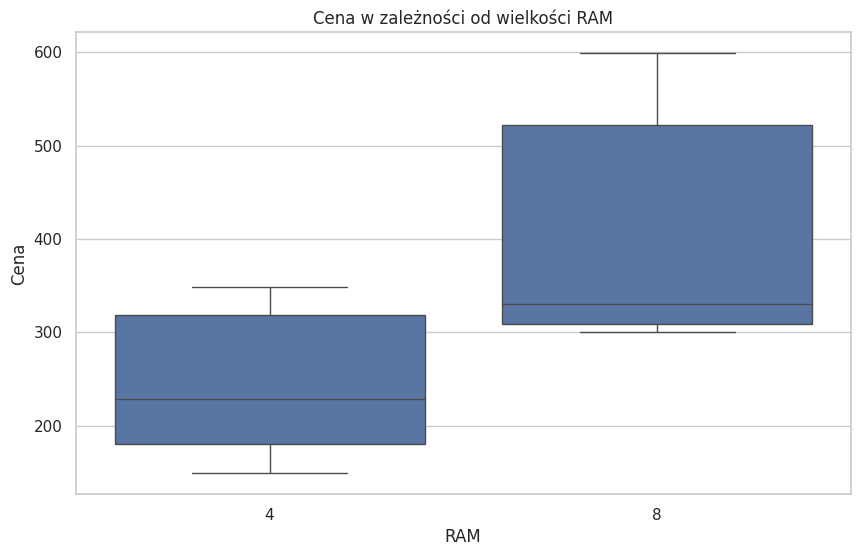

In [10]:
# Wykres pudełkowy dla cen w zależności od wielkości RAM
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='Cena', data=chromebooks_df)
plt.title('Cena w zależności od wielkości RAM')
plt.xlabel('RAM')
plt.ylabel('Cena')
plt.show()

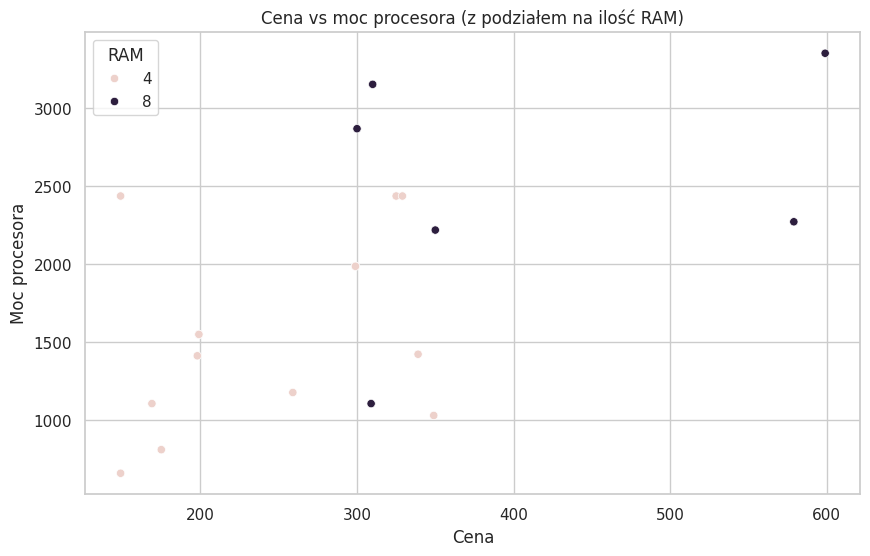

In [11]:
# Wykres punktowy ceny vs moc procesora
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chromebooks_df, x='Cena', y='Moc procesora', hue='RAM')
plt.title('Cena vs moc procesora (z podziałem na ilość RAM)')
plt.xlabel('Cena')
plt.ylabel('Moc procesora')
plt.legend(title='RAM')
plt.show()


In [12]:
# Średnia cena dla Chromebooków z 8 lub 4 GB
srednia_cena_8 = chromebooks_df[chromebooks_df['RAM'] == 8]['Cena'].mean()
srednia_cena_4 = chromebooks_df[chromebooks_df['RAM'] == 4]['Cena'].mean()

print(f"Średnia cena Chromebooków z 8 GB RAM: {srednia_cena_8}")
print(f"Średnia cena Chromebooków z 4 GB RAM: {srednia_cena_4}")


Średnia cena Chromebooków z 8 GB RAM: 407.8333333333333
Średnia cena Chromebooków z 4 GB RAM: 245.5
